<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Александр!</b>

Меня зовут Алексей, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все импорты в одном месте, удобно :)</div>

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
RANDOM_STATE = 42

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: здорово, что выносишь значение random_state в константу!</div>

## Разбейте данные на выборки

In [4]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

Отделим тестовую выборку

In [5]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.2, stratify=target, random_state=42
)

Отделим от обучающей выборки валидационную выборку

In [6]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=.16, stratify=target_train, random_state=RANDOM_STATE
)

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: пусть `x` — это общее количество строк в датасете. Тогда после первого разделения в `features_train` осталось `0.8x` записей, а после второго разделения с выбранным test_size=0.2 в обучающей выборке останется `0.64x` записей(`0.8x*0.8`), а в валидационной — `0.16x`. Если ты хочешь добиться отношения размеров выборок как 60/20/20, то стоит поменять параметр test_size во втором разделении
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: еще выборки лучше стратифицировать с помощью параметра **stratify** в train_test_split. Так у тебя точно не возникнет ситуации, когда, например, в тестовой выборке соотношение классов будет сильно отличаться от соотношения в обучающей выборке

Подробнее про стратификацию:
* https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
* https://realpython.com/train-test-split-python-data/#application-of-train_test_split    
* https://habr.com/ru/post/496750/
* https://habr.com/ru/company/X5Group/blog/596279/
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Поправил разделение выборки. Также добавил стратификацию. Спасибо большое за статьи!
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: со стратификацией все верно :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️:  раз после первого разделения в обучающей выборке осталось 0.8x записей, то для того, чтобы оставить в ней 60%, при втором разделении необходимо использовать `test_size=0.25`(`0.8x * 0.75 = 0.6`)</div>

## Исследуйте модели

Исследуем модель Решающее дерево. Так как данные содержат всего 4 параметра, то будем перебирать гиперпараметр `max_depth` от 1 до 4

In [7]:
best_model_tree = None
best_acc_tree = 0
for depth in range(1, 5):
    model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    model.fit(features_train, target_train)
    acc = model.score(features_valid, target_valid)
    if acc > best_acc_tree:
        best_acc_tree = acc
        best_model_tree = model
print(f'''Лучшая модель DecisionTreeClassifier имеет следующие гиперпараметры:
max_depth = {best_model_tree.get_params().get("max_depth")}.
Accurecy модели равен {best_acc_tree:.4f}''')

Лучшая модель DecisionTreeClassifier имеет следующие гиперпараметры:
max_depth = 4.
Accurecy модели равен 0.7961


Исследуем модель случайный лес. Так как данные содержат всего 4 параметра, то будем перебирать гиперпараметр `max_depth` от 1 до 10. Количество "оценщиков" (`n_estimators`) будем перебирать от 1 до 20

In [8]:
best_model_rand_forest = None
best_acc_rand_forest = 0
for est in range(1, 21):
    for depth in range(1, 11):
        model = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=RANDOM_STATE)
        model.fit(features_train, target_train)
        acc = model.score(features_valid, target_valid)
        if acc > best_acc_rand_forest:
            best_acc_rand_forest = acc
            best_model_rand_forest = model
print(f'''Лучшая модель RandomForestClassifier имеет следующие гиперпараметры:
max_depth = {best_model_rand_forest.get_params().get("max_depth")}
n_estimators = {best_model_rand_forest.get_params().get("n_estimators")}.
Accurecy модели равен {best_acc_rand_forest:.4f}''')

Лучшая модель RandomForestClassifier имеет следующие гиперпараметры:
max_depth = 7
n_estimators = 6.
Accurecy модели равен 0.8204


Исследуем модель логистической регрессии. Так как данных не много, то количество итераций для обучения выставим равным 200.

In [9]:
model_log_regression = LogisticRegression(max_iter=200, solver='lbfgs', random_state=RANDOM_STATE)
model_log_regression.fit(features_train, target_train)
acc_log_regression = model_log_regression.score(features_valid, target_valid)
print(f'Модель LogisticRegression имеет accurecy = {acc_log_regression:.4f}')

Модель LogisticRegression имеет accurecy = 0.7597


**Вывод:** в результате было исследовано 3 модели: решающее дерево, случайный лес и логистическая регрессия. В результате для решающего дерева были подобраны следующие гиперпараметры: `max_depth=3`. С данными гиперпараметрами метка `accuracy=0.7961`. Для модели случайного леса были подобраны следующие гиперпараметры: `max_depth=7`, `n_estimators=6`. С даннами гиперпараметрами метка `accuracy=0.8204`. На модели модели логистической регресси при обучении на 200 итерациях и использованиии алгоритма оптимизации `lbfgs` метрика `accuracy=0.7591`  
Наилучшее качество показала модель случайного леса. Модель решающее дерево лишь немного уступила в качестве, но гораздо быстрее по времени работы. Будем считать, что в нашей задаче важнее лучшее качество работы и мы можем пожертвовать временем работы. Поэтому для дальнейшей работы выберем модель случайного леса с гимерпараметрами `max_depth=7`, `n_estimators=6`.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, похоже, случайный лес здесь фаворит :)</div>

## Проверьте модель на тестовой выборке

Проверим модель случайного леса на тестовой выборке

In [10]:
acc_on_test = best_model_rand_forest.score(features_test, target_test)
print(f'Лучшая модель случайного леса на тестовой выборке имеет '
      f'accuracy = {acc_on_test:.4f}')

Лучшая модель случайного леса на тестовой выборке имеет accuracy = 0.8320


<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: на тестовой выборке нельзя сравнивать модели(или подбирать гиперпараметры), иначе она перестанет быть независимой. Она используется на этапе финального тестирования только чтобы проверить одну лучшую модель по метрикам на валидации с прошлого этапа(с уже подобранными гиперпараметрами)</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Убрал сравнение качества моделей на тестовой выборке и изучил только качество лучшей.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, бейзлайн побит, ура!</div>

**Вывод:** На тестовых данных лучшая модель случайного леса имеет метрику `accuracy=0.8320` 
  
Таким образом, модель случайного леса имеет хорошие результаты качества на тестовой выборке и может быть использована для дальнейшей работы. Гиперпараметры модели: `max_depth=7`, `n_estimators=6`

## (бонус) Проверьте модели на адекватность

Проверим как соотносятся между собой классы в выборке

In [11]:
df.query('is_ultra == 1')['is_ultra'].count() / df.shape[0]

0.30647168637212197

Видно, что наблюдается явный дисбаланс классов в выборке. Объекты с классом `Смарт` составляют 70% выборки, а объекты с классом 
`Ультра` составляют лишь 30%. Данный факт может значительно влиять на качество модели, так как модель может определять все объекты к классу `Смарт` и все равно получить на тестовой выборке высокое значение метрики `accuracy`.  
Проверим значение метрик `precision` и `recall` для всех моделей

In [12]:
pred = best_model_tree.predict(features_test)
print(f'''Для модели решающего дерева:
accuracy = {best_model_tree.score(features_test, target_test):.4f}
precision = {precision_score(target_test, pred):.4f}
recall = {recall_score(target_test, pred):.4f}''')

Для модели решающего дерева:
accuracy = 0.8040
precision = 0.8087
recall = 0.4721


In [13]:
pred = best_model_rand_forest.predict(features_test)
print(f'''Для модели случайного леса:
accuracy = {best_model_rand_forest.score(features_test, target_test):.4f}
precision = {precision_score(target_test, pred):.4f}
recall = {recall_score(target_test, pred):.4f}''')

Для модели случайного леса:
accuracy = 0.8320
precision = 0.8560
recall = 0.5431


In [14]:
pred = model_log_regression.predict(features_test)
print(f'''Для модели логистической регрессии:
accuracy = {model_log_regression.score(features_test, target_test):.4f}
precision = {precision_score(target_test, pred):.4f}
recall = {recall_score(target_test, pred):.4f}''')

Для модели логистической регрессии:
accuracy = 0.7403
precision = 0.8409
recall = 0.1878


Как видно из результатов модель логистической регрессии работает не адекватно на данном наборе данных. Метрика `precision=0.8409`, а `recall=0.1878`. Получается, что логистической регрессии почти всем объекта назначает класс `Смарт` и за счет неравномерности выборки получет достаточно высокое значение `accuracy`. Однако данную модель нельзя применять на практике.  
Модели решающего дерева и случайного леса показывают гораздо лучшие результаты и могут применяться на практике.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все верно, это одна из проблем метрики accuracy, при дисбалансе данных она становится непоказательной</div>


## Эсперимент с равномерной выборкой

Составим выборку, где объектов каждого класса будет равное количество

In [15]:
df_ultra = df.query('is_ultra == 1')
count_ultra = df_ultra.shape[0]
df_smart = df.query('is_ultra == 0')[:count_ultra]
df_2 = df_ultra.append(df_smart, ignore_index = True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1970 non-null   float64
 1   minutes   1970 non-null   float64
 2   messages  1970 non-null   float64
 3   mb_used   1970 non-null   float64
 4   is_ultra  1970 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 77.1 KB


<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: устранять дисбаланс можно только в обучающей выборке, иначе метрики на валидации/тесте будут смещены. Подробнее про дисбаланс классов и борьбу с ним расскажут в следующем спринте</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Почитал некоторые статьи про дисбаланс классов, но так и не понял, почему при устранении дисбаланса на всей выборке метрики на валидации/тесте будет смещены. Если не сложно, можешь пожалуйста объяснить или посоветовать какие-нибудь статьи?
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: при устранении дисбаланса в общей выборке в валидационной и тестовой выборке также изменится соотношение классов, это может привести к слишком оптимистичным метрикам: ведь после внедрения модели придется предсказывать все также несбалансированные данные, а устранить дисбаланс в реальных данных уже не получится, ведь целевого признака не будет. Поэтому валидационную и тестовую выборки всегда оставляют исходными, чтобы метрики оставались показательны, но устраняют дисбаланс в обучающей выборке, чтобы модель научилась определять оба класса достаточно хорошо. Весь следующий проект будет посвящен борьбы с дисбалансом, у тебя еще будет возможность разобраться подробнее :)</div>

In [16]:
features_2 = df_2.drop('is_ultra', axis=1)
target_2 = df_2['is_ultra']
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
    features_2, target_2, stratify=target_2, test_size=.25
)

In [17]:
tree_2 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
tree_2.fit(features_train_2, target_train_2)
pred = tree_2.predict(features_test_2)
print(f'''Для модели решающего дерева:
accuracy = {tree_2.score(features_test_2, target_test_2):.4f}
precision = {precision_score(target_test_2, pred):.4f}
recall = {recall_score(target_test_2, pred):.4f}''')

Для модели решающего дерева:
accuracy = 0.7282
precision = 0.9308
recall = 0.4919


In [18]:
rand_forest_2 = RandomForestClassifier(max_depth=4, n_estimators=5, random_state=RANDOM_STATE)
rand_forest_2.fit(features_train_2, target_train_2)
pred = rand_forest_2.predict(features_test_2)
print(f'''Для модели случайного леса:
accuracy = {rand_forest_2.score(features_test_2, target_test_2):.4f}
precision = {precision_score(target_test_2, pred):.4f}
recall = {recall_score(target_test_2, pred):.4f}''')

Для модели случайного леса:
accuracy = 0.7424
precision = 0.8940
recall = 0.5488


In [19]:
log_regression_2 = LogisticRegression(max_iter=200, solver='lbfgs', random_state=RANDOM_STATE)
log_regression_2.fit(features_train_2, target_train_2)
pred = log_regression_2.predict(features_test_2)
print(f'''Для модели логистической регрессии дерева:
accuracy = {log_regression_2.score(features_test_2, target_test_2):.4f}
precision = {precision_score(target_test_2, pred):.4f}
recall = {recall_score(target_test_2, pred):.4f}''')

Для модели логистической регрессии дерева:
accuracy = 0.4665
precision = 0.4775
recall = 0.7317


**Вывод:** Для моделей решающее дерево и случайный лес метра `accuracy` упала (с `0.8040` до `0.6795`) и (с `0.8320` до `0.7099`) соответственно. Метрики `precision` и `recall` остались примерно на том же уровне.  
Скорее всего, это связано с тем, что данных в датасете стало меньше, но они стали равнораспределенными.  
  
Для модели логистической регрессии, обученной на равнораспределенной выборке, все метрики значительно изменились и стали равняться: `accuracy = 0.4807`, `precision = 0.4864`, `recall = 0.7276`. С учетом того, что в выборке объектов каждого класса равное количество, то значение метрик говорит нам о том, что модель работает на уровне случайности, что евляется неадекватной работой и не может быть использовано.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: если интересно, то еще можно узнать, как именно тот или иной признак влияет на обучение модели, для этого есть **feature_importances**, то есть важность признаков для решения модели. Это позволит убедиться, что модель обучилась корректно, сравнив результаты исследовательского анализа с результатами модели. А если важность очень мала, то такие признаки можно даже удалить, метрики, вероятно, поменяются незначительно

Подробнее про **feature_importances**:
* https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
* https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://christophm.github.io/interpretable-ml-book/feature-importance.html<</div>

<AxesSubplot:title={'center':'Важность признаков в лучшей модели случайного леса'}, ylabel='Средняя важность признаков'>

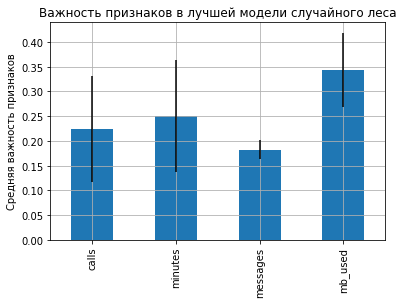

In [20]:
importances_features = best_model_rand_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_rand_forest.estimators_], axis=0)
forest_importances = pd.Series(importances_features, index=features.columns)
forest_importances.plot.bar(
    yerr=std,
    grid=True,
    title='Важность признаков в лучшей модели случайного леса',
    ylabel='Средняя важность признаков'
)

В итоге получилось, что для лучше модели случайного дерева самым важным оказался признак mb_used (израсходованный интернет-трафик в Мб). Важность данного признака почти 0.35, тогда как остальные признаки имею важность не больше 0.25. Данный факт не противоречит логике. Сейчас люди все больше общаются именно в интернете (сообщения в месседжерах, интернет-звонки, использование видеохостингов и т.д.), поэтому для многих пользователей самой важной частью тарифа является именно пакет интернет трафика.

<div class="alert alert-info">
    <b>Комментарий студента:</b> Построил карту влияния признаков.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: круто, что получилось разобраться с важностью признаков!</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


**Общий вывод:** В результате работы была исследована работа трех моделей. Модель решающее дерево показывает наилучшие результаты, когда максимальная глубина дерева не превышает 3. Модель случайный лес показывает наилучшие результаты, когда максимальная глубина деревьев не превышает 4, и имеется 5 оценщиков. При этом входе исследования выяснилось, что модель логистической регрессии показывает на данном наборе данных не адекватные результаты и не годится для использования. По всей видимости данные нельзя хорошо классифицировать линейной моделью.  
Наилучшие реззультаты показала модель случайного леса. Метрики для данной модели, посчитанные на тестовой выборке: `accuracy = 0.8072`, `precision = 0.7712`, `recall = 0.4840`. Однако модель решающего дерева лишь немного уступила в качестве моделе случайного леса. Метрики для модели решающее дерево, посчитанные на тестовой выборке: `accuracy = 0.8056`, `precision = 0.7739`, `recall = 0.4734`. Однако, если учитывать, что модель решающего дерева работает значительно быстрее модели случайного леса, то для использования на практике стоит выбрать модель решающего дерева с максимальной глубиной не больше 3.

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Чистый и структурированный проект, спасибо, такие всегда приятно проверять!

Осталось убрать сравнение моделей на тестовой выборке, и я смогу принять твою работу

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Спасибо большое советы и ссылки. Было очень интересно и познавательно
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

То, что нужно, молодец! Рад, что мои советы оказались полезны :)

Критичное замечание исправлено, и теперь я могу принять твой проект

<b>Успехов в обучении!</b>
        
</div>